<a href="https://colab.research.google.com/github/alesaccoia/IULM_DDM2324_Notebooks/blob/main/19_RFM_RegressioneLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esempio di utilizzo dei valori RFM per l'ottimizzazione di una campagna di marketing

In [5]:
!pip install imblearn

In [1]:
import pandas as pd

# Load the dataset from the provided Excel file
rfm_response_data = pd.read_excel("rfm_response.xlsx")

# Display the first few rows of the dataset
rfm_response_data.head()


,Response,Customer,R,F,M
0,0,1,3,1,1
1,1,2,3,2,3
2,0,3,4,2,3
3,0,4,5,4,4
4,1,5,1,1,1


Si prova a utilizzare la regressione logistica per calcolare chi colpire

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the data into train and test sets
X = rfm_response_data[['R', 'F', 'M']]
y = rfm_response_data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.91,
 '              precision    recall  f1-score   support\n\n           0       0.91      1.00      0.95       910\n           1       0.00      0.00      0.00        90\n\n    accuracy                           0.91      1000\n   macro avg       0.46      0.50      0.48      1000\nweighted avg       0.83      0.91      0.87      1000\n')

In [3]:
print(accuracy)

0.91


In [4]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       910
           1       0.00      0.00      0.00        90

    accuracy                           0.91      1000
   macro avg       0.46      0.50      0.48      1000
weighted avg       0.83      0.91      0.87      1000



In [6]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a logistic regression model on the SMOTE-augmented data
logreg_smote = LogisticRegression(max_iter=1000)
logreg_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = logreg_smote.predict(X_test)

# Calculate accuracy and other metrics for the SMOTE model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
classification_rep_smote = classification_report(y_test, y_pred_smote)

accuracy_smote, classification_rep_smote


(0.565,
 '              precision    recall  f1-score   support\n\n           0       0.93      0.57      0.70       910\n           1       0.11      0.56      0.19        90\n\n    accuracy                           0.56      1000\n   macro avg       0.52      0.56      0.44      1000\nweighted avg       0.85      0.56      0.66      1000\n')

In [7]:
print(classification_rep_smote)

              precision    recall  f1-score   support

           0       0.93      0.57      0.70       910
           1       0.11      0.56      0.19        90

    accuracy                           0.56      1000
   macro avg       0.52      0.56      0.44      1000
weighted avg       0.85      0.56      0.66      1000



In [9]:
print(accuracy_smote)

0.565


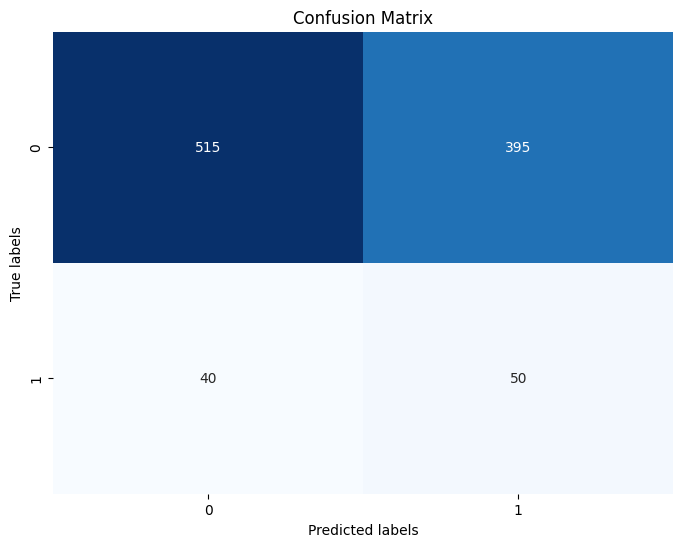

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_smote)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
